In [64]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from sklearn.decomposition import PCA

from src.agents.dqn.models.embedding_mlp import EmbeddingMLP
from src.game.combat.view.card import CardName

In [10]:
model = EmbeddingMLP(4, 3, [256, 512, 1024, 512, 256])
model.load_state_dict(
    torch.load("/Users/getchebarne/Desktop/slai-the-spire/experiments/dummy/8/model.pth")
)

/Users/getchebarne/Desktop/slai-the-spire/.venv/lib/python3.10/site-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


<All keys matched successfully>

In [13]:
vecs = {}

with torch.no_grad():
    vecs[None] = model._card_name_embedding(
        torch.tensor(0)
    ).numpy()
    vecs[CardName.STRIKE.name] = model._card_name_embedding(
        torch.tensor(1)
    ).numpy()
    vecs[CardName.DEFEND.name] = model._card_name_embedding(
        torch.tensor(2)
    ).numpy()
    vecs[CardName.NEUTRALIZE.name] = model._card_name_embedding(
        torch.tensor(3)
    ).numpy()
    vecs[CardName.SURVIVOR.name] = model._card_name_embedding(
        torch.tensor(4)
    ).numpy()

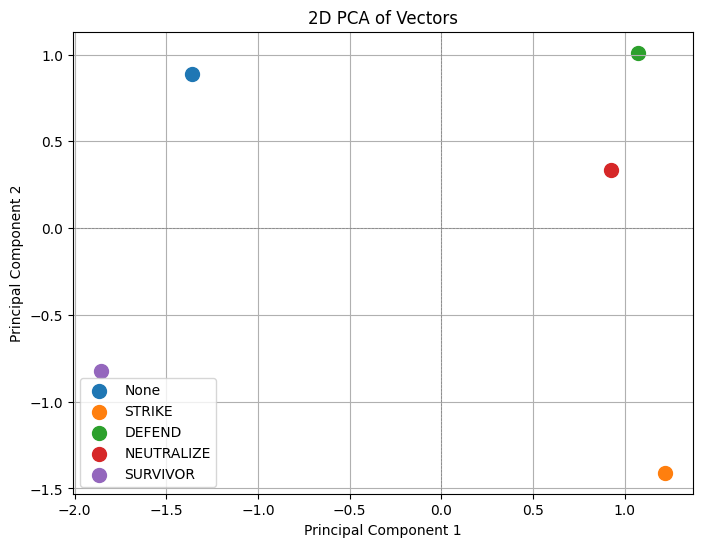

In [15]:
# Separate keys and vectors
labels = list(vecs.keys())
vectors = np.array(list(vecs.values()))

# Perform PCA
pca = PCA(n_components=2)
transformed = pca.fit_transform(vectors)

# Plot the PCA results
plt.figure(figsize=(8, 6))
for i, label in enumerate(labels):
    plt.scatter(transformed[i, 0], transformed[i, 1], label=str(label), s=100)

# Customize plot
plt.title("2D PCA of Vectors")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.grid()
plt.show()

# Transformers

In [65]:
import torch
from transformers import AutoTokenizer, AutoModel

In [ ]:
model_name = "sentence-transformers-testing/stsb-bert-tiny-safetensors"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

def get_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=False, padding=False)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze()

In [61]:
embs = {
    "Deal 6 damage.": [],
    "Deal 3 damage. Apply 1 weak.": [],
    "Gain 5 block.": [],
    "Gain 8 block. Discard 1 card.": [],
    "": [],
}
for text in embs:
    embs[text] = get_embedding(text)

In [62]:
embs

{'Deal 6 damage.': tensor([-0.6630, -0.0591, -2.0734, -0.1162,  0.2844,  0.6298, -0.0540, -1.0162,
         -0.1504,  0.5710, -1.2752,  0.3408, -1.6019,  0.2091, -0.0830,  0.3184,
         -2.0507,  0.1029, -0.8902,  1.1923,  0.9044,  0.6406,  0.4041,  0.6969,
          0.4119,  0.1960, -1.0606, -1.5407,  0.0159, -0.3295,  0.1992, -0.5425,
          0.5112, -0.0417,  0.7291, -0.1748, -0.8186, -0.1859,  0.4414, -0.4495,
         -0.9238, -0.5310,  0.5003, -0.4675, -0.0100, -0.2727, -1.0391, -0.6101,
         -0.0392,  0.0756, -0.6653,  1.9841,  0.2216,  0.0313,  0.0537, -0.1539,
          0.5685, -0.4629,  0.4994,  2.1204, -0.6357,  1.3694, -0.0287,  0.8548,
         -1.4101,  0.8593,  1.4827,  0.5677, -0.7162, -0.2515, -1.0061,  0.1237,
          2.0949, -0.7626, -1.5110,  0.4774, -0.6439,  1.3839, -0.2616, -1.4057,
         -0.1136,  0.3126, -1.2493,  1.2359, -0.8815,  0.9253,  0.1240, -0.4135,
          0.3403,  0.4988,  0.9960,  0.5723, -1.6119, -0.7960, -2.5148, -1.0101,
         -

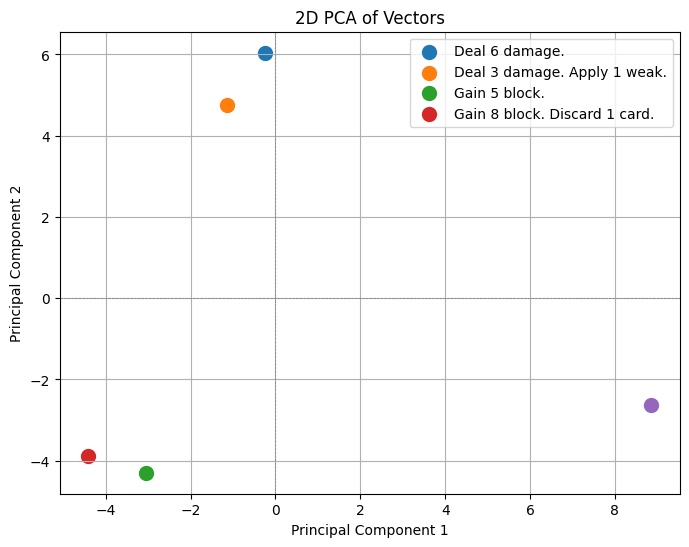

In [63]:
# Separate keys and vectors
labels = list(embs.keys())
vectors = np.array(list(embs.values()))

# Perform PCA
pca = PCA(n_components=2)
transformed = pca.fit_transform(vectors)

# Plot the PCA results
plt.figure(figsize=(8, 6))
for i, label in enumerate(labels):
    plt.scatter(transformed[i, 0], transformed[i, 1], label=str(label), s=100)

# Customize plot
plt.title("2D PCA of Vectors")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.grid()
plt.show()